In [129]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import scipy
import networkx as nx


In [96]:
path='./data/'

In [97]:
with open(path+"Rheumatoid arthritis.json", "r") as Rh_json:
    Rh_python = json.load(Rh_json)

In [98]:
Rh_python['_embedded']['terms'][0]['synonyms']

['RA - Rheumatoid arthritis',
 'Rheumatoid disease',
 'RhA - Rheumatoid arthritis',
 'arthritis or polyarthritis, rheumatic',
 'atrophic arthritis',
 'Chronic rheumatic arthritis',
 'autoimmune arthritis',
 'rheumatoid arthritis',
 'Rheumatoid arthritis (disorder)',
 'Rheumatoid arthritis NOS (disorder)',
 'Arthritis, Rheumatoid',
 'RA',
 'arthritis, rheumatoid',
 'Rheumatoid arthritis NOS',
 'atrophic Arthritis',
 'Rheumatic gout',
 'Arthritis or polyarthritis, rheumatic',
 'Proliferative arthritis']

In [300]:
studies_rh = pd.read_csv(path+'efotraits_EFO_0000685-studies-2021-07-6.csv')
Associations_rh  = pd.read_csv(path+'efotraits_EFO_0000685-associations-2021-07-6.csv')
len_rh=len(Associations_rh)

studies_po = pd.read_csv(path+'efotraits_EFO_0000676-studies-2021-07-6.csv')
Associations_po  = pd.read_csv(path+'efotraits_EFO_0000676-associations-2021-07-6.csv')
len_po=len(Associations_po)

In [301]:
studies.head(5)

,First author,Study accession,Publication date,Journal,Title,Reported trait,Trait(s),Discovery sample number and ancestry,Replication sample number and ancestry,Association count,Summary statistics
0,de Rooy DP,GCST003256,2015-06-15,J Rheumatol,Genetic Factors for the Severity of ACPA-negat...,Joint damage progression in ACPA-negative rheu...,"ACPA-negative rheumatoid arthritis, joint dama...",262 European,253 European,1,NaN
1,Ellinghaus E,GCST001355,2011-12-15,J Invest Dermatol,Genome-wide meta-analysis of psoriatic arthrit...,Psoriatic arthritis,psoriatic arthritis,3967 European,8716 European,2,NaN
2,Jiang X,GCST006807,2015-08-13,Rheumatology (Oxford),An Immunochip-based interaction study of contr...,ACPA-negative rheumatoid arthritis (smoking in...,"rheumatoid arthritis, smoking status measureme...",2573 European,'-,0,NaN
3,Wei WH,GCST005826,2017-07-13,Sci Rep,Genotypic variability based association identi...,Sero-negative rheumatoid arthritis,rheumatoid arthritis,19108 European,'-,2,NaN
4,Hu HJ,GCST001203,2011-08-16,Exp Mol Med,Common variants at the promoter region of the ...,Rheumatoid arthritis,rheumatoid arthritis,700 East Asian,1289 East Asian,1,NaN


In [302]:
Associations=pd.concat([Associations_rh,Associations_po],ignore_index=True,axis=0)

In [303]:
Associations

,Variant and risk allele,P-value,P-value annotation,RAF,OR,Beta,CI,Mapped gene,Reported trait,Trait(s),Study accession,PubMed ID,First Author,Location
0,rs13017599-<b>?</b>,1 x 10-8,NaN,NR,1.27,'-,[1.18-1.35],NONOP2,Psoriatic arthritis,psoriatic arthritis,GCST001355,22170493.0,Ellinghaus E,2:60937196
1,rs702873-<b>?</b>,2 x 10-7,NaN,NR,1.2,'-,[1.13-1.28],LINC01185,Psoriatic arthritis,psoriatic arthritis,GCST001355,22170493.0,Ellinghaus E,2:60854407
2,rs3104413-<b>?</b>,2 x 10-10,(adjusted for HLA shared epitope),NR,1.7857143,'-,[1.35-2.56],"HLA-DRB1, HLA-DQA1",ACPA-positive rheumatoid arthritis (smoking in...,"rheumatoid arthritis, smoking status measureme...",GCST006410,26272072.0,Jiang X,6:32614873
3,rs3129769-<b>?</b>,3 x 10-11,(adjusted for HLA shared epitope),NR,1.724138,'-,[1.33-2.44],HLA-DQA1,ACPA-positive rheumatoid arthritis (smoking in...,"rheumatoid arthritis, smoking status measureme...",GCST006410,26272072.0,Jiang X,6:32629245
4,rs3957146-<b>?</b>,1 x 10-6,(adjusted for HLA shared epitope),NR,1.724138,'-,[1.22-2.86],"AL662789.1, MTCO3P1",ACPA-positive rheumatoid arthritis (smoking in...,"rheumatoid arthritis, smoking status measureme...",GCST006410,26272072.0,Jiang X,6:32713753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,rs17728338-<b>A</b>,2 x 10-14,NaN,NR,1.557,'-,NR,"ANXA6, TNIP1",Cutaneous psoriasis,"cutaneous psoriasis measurement, psoriasis",GCST003269,NaN,NaN,5:151098757
2458,rs2082412-<b>G</b>,1 x 10-13,NaN,NR,1.35,'-,NR,"AC008691.1, UBLCP1",Cutaneous psoriasis,"cutaneous psoriasis measurement, psoriasis",GCST003269,NaN,NaN,5:159290781
2459,rs10484554-<b>T</b>,4 x 10-207,NaN,NR,3.304,'-,NR,HLA-B,Cutaneous psoriasis,"cutaneous psoriasis measurement, psoriasis",GCST003269,NaN,NaN,6:31306778
2460,rs610604-<b>G</b>,8 x 10-11,NaN,0.3201,1.23,'-,NR,TNFAIP3,Cutaneous psoriasis,"cutaneous psoriasis measurement, psoriasis",GCST003269,NaN,NaN,6:137878280


In [304]:
pd.unique(Associations['Trait(s)'])

array(['psoriatic arthritis',
       'rheumatoid arthritis, smoking status measurement, ACPA-positive rheumatoid arthritis',
       'anterior uveitis, ankylosing spondylitis',
       'ankylosing spondylitis', 'rheumatoid arthritis',
       'rheumatoid arthritis, interstitial lung disease',
       'rheumatoid arthritis, joint damage measurement',
       'response to methotrexate, rheumatoid arthritis',
       'rheumatoid arthritis, response to TNF antagonist',
       'rheumatoid arthritis, disease progression measurement',
       'response to methotrexate, rheumatoid arthritis, interstitial lung disease',
       'rheumatoid arthritis, anti-citrullinated protein antibody seropositivity, rheumatoid factor seropositivity measurement',
       'rheumatoid arthritis, response to TNF antagonist, blood sedimentation',
       'rheumatoid arthritis, response to TNF antagonist, joint damage measurement',
       'rheumatoid arthritis, self rated health, response to TNF antagonist',
       'rheumato

In [347]:

np.sum((Associations['Mapped gene']=='IL6R').astype(int))
# np.sum((Associations['Variant and risk allele']=='TN').astype(int))

12

In [340]:
Associations['Mapped gene']

0                    NONOP2
1                 LINC01185
2        HLA-DRB1, HLA-DQA1
3                  HLA-DQA1
4       AL662789.1, MTCO3P1
               ...         
2457           ANXA6, TNIP1
2458     AC008691.1, UBLCP1
2459                  HLA-B
2460                TNFAIP3
2461                   NOS2
Name: Mapped gene, Length: 2462, dtype: object

In [332]:
Associations['P-value']

0         1 x 10-8
1         2 x 10-7
2        2 x 10-10
3        3 x 10-11
4         1 x 10-6
           ...    
2457     2 x 10-14
2458     1 x 10-13
2459    4 x 10-207
2460     8 x 10-11
2461      8 x 10-6
Name: P-value, Length: 2462, dtype: object

In [337]:
Associations

,Variant and risk allele,P-value,P-value annotation,RAF,OR,Beta,CI,Mapped gene,Reported trait,Trait(s),Study accession,PubMed ID,First Author,Location
0,rs13017599-<b>?</b>,1 x 10-8,NaN,NR,1.27,'-,[1.18-1.35],NONOP2,Psoriatic arthritis,psoriatic arthritis,GCST001355,22170493.0,Ellinghaus E,2:60937196
1,rs702873-<b>?</b>,2 x 10-7,NaN,NR,1.2,'-,[1.13-1.28],LINC01185,Psoriatic arthritis,psoriatic arthritis,GCST001355,22170493.0,Ellinghaus E,2:60854407
2,rs3104413-<b>?</b>,2 x 10-10,(adjusted for HLA shared epitope),NR,1.7857143,'-,[1.35-2.56],"HLA-DRB1, HLA-DQA1",ACPA-positive rheumatoid arthritis (smoking in...,"rheumatoid arthritis, smoking status measureme...",GCST006410,26272072.0,Jiang X,6:32614873
3,rs3129769-<b>?</b>,3 x 10-11,(adjusted for HLA shared epitope),NR,1.724138,'-,[1.33-2.44],HLA-DQA1,ACPA-positive rheumatoid arthritis (smoking in...,"rheumatoid arthritis, smoking status measureme...",GCST006410,26272072.0,Jiang X,6:32629245
4,rs3957146-<b>?</b>,1 x 10-6,(adjusted for HLA shared epitope),NR,1.724138,'-,[1.22-2.86],"AL662789.1, MTCO3P1",ACPA-positive rheumatoid arthritis (smoking in...,"rheumatoid arthritis, smoking status measureme...",GCST006410,26272072.0,Jiang X,6:32713753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,rs17728338-<b>A</b>,2 x 10-14,NaN,NR,1.557,'-,NR,"ANXA6, TNIP1",Cutaneous psoriasis,"cutaneous psoriasis measurement, psoriasis",GCST003269,NaN,NaN,5:151098757
2458,rs2082412-<b>G</b>,1 x 10-13,NaN,NR,1.35,'-,NR,"AC008691.1, UBLCP1",Cutaneous psoriasis,"cutaneous psoriasis measurement, psoriasis",GCST003269,NaN,NaN,5:159290781
2459,rs10484554-<b>T</b>,4 x 10-207,NaN,NR,3.304,'-,NR,HLA-B,Cutaneous psoriasis,"cutaneous psoriasis measurement, psoriasis",GCST003269,NaN,NaN,6:31306778
2460,rs610604-<b>G</b>,8 x 10-11,NaN,0.3201,1.23,'-,NR,TNFAIP3,Cutaneous psoriasis,"cutaneous psoriasis measurement, psoriasis",GCST003269,NaN,NaN,6:137878280


In [307]:
len(pd.unique(Associations['Variant and risk allele']))


edges=[]
for ii in range(len(Associations)):
    tup=(Associations['Variant and risk allele'][ii],Associations['Mapped gene'][ii])
    edges.append(tup)
    
for ii in range(len(Associations)):
    if ii<len_rh:
        tup=(Associations['Trait(s)'][len_rh-1],Associations['Mapped gene'][ii])
    else:
        tup=('psoriasis',Associations['Mapped gene'][ii])
    edges.append(tup)

In [310]:
G.nodes

NodeView(('rs13017599-<b>?</b>', 'rs702873-<b>?</b>', 'rs3104413-<b>?</b>', 'rs3129769-<b>?</b>', 'rs3957146-<b>?</b>', 'rs3998159-<b>?</b>', 'rs6931277-<b>?</b>', 'rs7454108-<b>?</b>', 'rs9275334-<b>?</b>', 'rs9275495-<b>?</b>', 'rs9275530-<b>?</b>', 'rs9275532-<b>?</b>', 'rs9784858-<b>?</b>', 'rs3129890-<b>?</b>', 'rs3129891-<b>?</b>', 'rs9268557-<b>?</b>', 'rs10484565-<b>?</b>', 'rs76412624-<b>?</b>', 'rs7281081-<b>?</b>', 'rs1580226-<b>?</b>', 'rs2274894-<b>?</b>', 'rs7784778-<b>?</b>', 'rs508063-<b>A</b>', 'rs10171979-<b>C</b>', 'rs10093384-<b>A</b>', 'rs27529-<b>A</b>', 'rs67412457-<b>A</b>', 'rs9947182-<b>T</b>', 'HLA-B*27-<b>?</b>', 'HLA-B*2705-<b>?</b>', 'rs10000518-<b>G</b>', 'rs148783236-<b>A</b>', 'rs1013210-<b>G</b>', 'rs7874251-<b>G</b>', 'rs34939008-<b>G</b>', 'chr18:14723700-<b>?</b>', 'rs6502398-<b>C</b>', 'rs7217335-<b>A</b>', 'rs8036083-<b>G</b>', 'rs13001372-<b>A</b>', 'rs4876208-<b>C</b>', 'rs10280089-<b>A</b>', 'rs235316-<b>T</b>', 'rs2031610-<b>C</b>', 'rs7298011

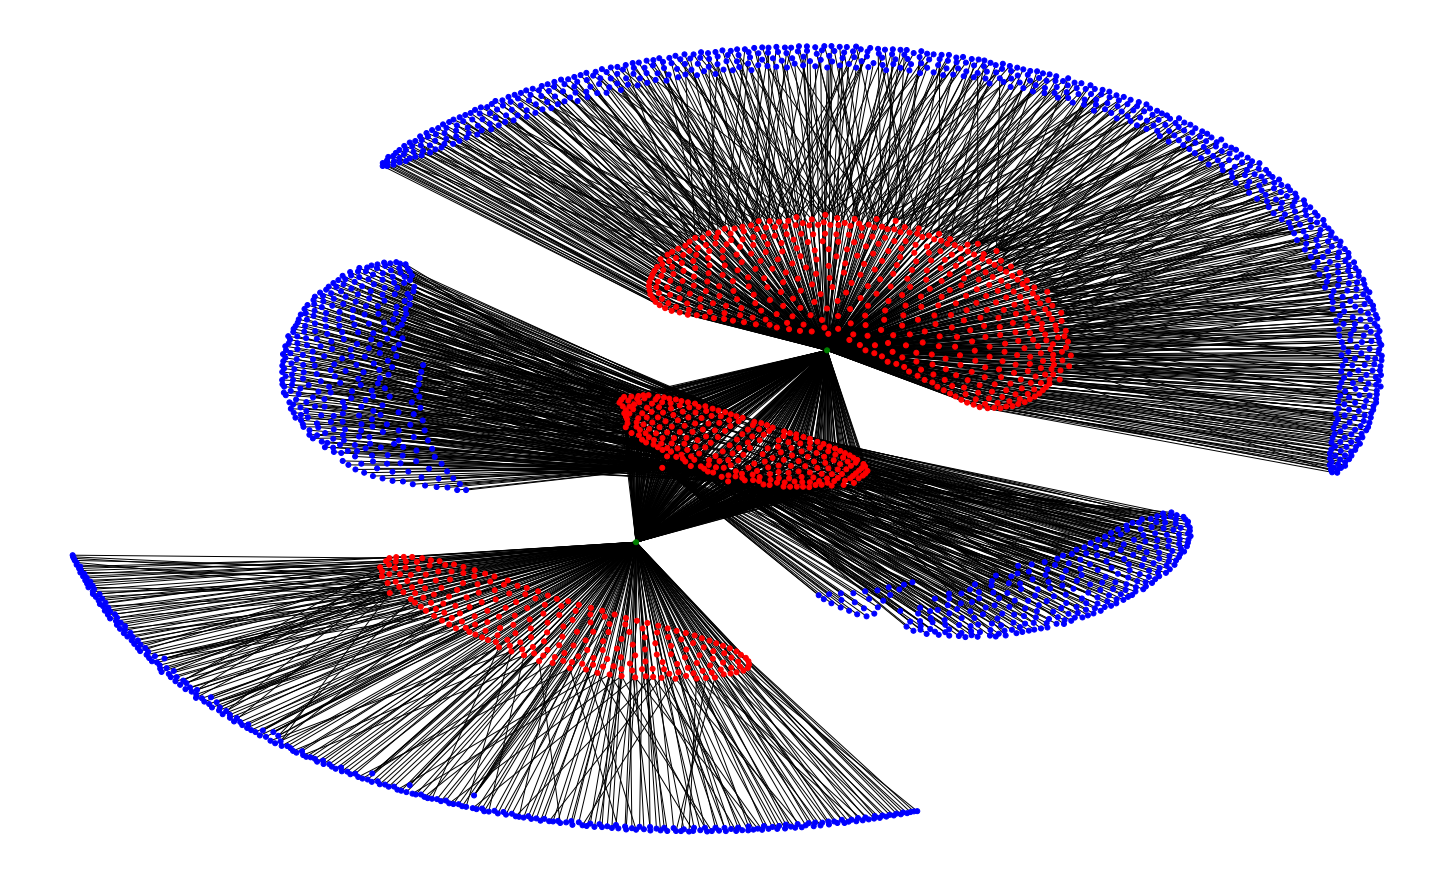

In [319]:
G=nx.Graph()


G.add_nodes_from(Associations['Variant and risk allele'],type='SNP')
G.add_nodes_from(Associations['Mapped gene'],type='Gene')
# G.add_nodes_from(Associations['Trait(s)'],type='Disease')
G.add_node('rheumatoid arthritis',type='Disease')
G.add_node('psoriasis',type='Disease')
G.add_edges_from(edges)
# color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}

color_state_map = {"SNP": 'red', "Gene": 'black', "Disease": 'blue'}

node_color = []

for node in G.nodes(data=True):

    if 'SNP' in node[1]['type']:
        node_color.append('blue')

    elif 'Gene' in node[1]['type']:
        node_color.append('red')

    elif 'Disease' in node[1]['type']:
        node_color.append('green')

plt.figure(figsize=(20, 12))
nx.draw_kamada_kawai(G, with_labels=False, node_size=25, node_color=node_color)

In [151]:
Associations['Variant and risk allele']

0       rs13017599-<b>?</b>
1         rs702873-<b>?</b>
2        rs3104413-<b>?</b>
3        rs3129769-<b>?</b>
4        rs3957146-<b>?</b>
               ...         
1612     rs6679677-<b>A</b>
1613     rs6457617-<b>T</b>
1614     rs3816587-<b>C</b>
1615      rs615672-<b>?</b>
1616    rs11761231-<b>G</b>
Name: Variant and risk allele, Length: 1617, dtype: object